In [48]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pyart
%matplotlib inline

In [49]:
radar = pyart.io.read('MDV-20150805-084449-PPIVol.nc')

In [50]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV'])

In [51]:
DBZH=radar.fields['DBZH']['data']
VELH=radar.fields['VELH']['data']


In [52]:
#DBZH[DBZH==-32768]=np.nan
VELH=pd.DataFrame(VELH)
#VELH=VELH.replace(-32768,np.nan)
DBZH.shape,VELH.shape

((9270, 2500), (9270, 2500))

In [53]:
#m_rvel=radar.fields['VELH']['data'].mask
m_dbz=radar.fields['DBZH']['data'].mask

In [24]:
#m_rvel.shape,m_dbz.shape

In [54]:
VELH=pd.DataFrame(VELH)
VELH=VELH.values*m_dbz

In [62]:
VELH

array([[-0.       , -0.       , -0.       , ..., -1.66     ,        nan,
         6.64     ],
       [-0.       , -0.       , -0.       , ..., -3.6899998,        nan,
        -8.3      ],
       [-0.       , -0.       , -0.       , ...,        nan,        nan,
               nan],
       ...,
       [-0.       , -0.       , -0.       , ...,        nan,        nan,
               nan],
       [-0.       , -0.       , -0.       , ...,  8.12     ,  5.35     ,
               nan],
       [-0.       , -0.       , -0.       , ..., -7.19     ,  3.32     ,
               nan]], dtype=float32)

In [63]:
~m_dbz

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [74]:
np_velh=pd.DataFrame(VELH)
pd_dbzh=pd.DataFrame(~m_dbz)
c_velh=np_velh[pd_dbzh]


In [75]:
pd_dbzh.shape,c_velh.shape,np_velh.shape

((9270, 2500), (9270, 2500), (9270, 2500))

In [77]:
mask_dict = {'data': c_velh, 'units': 'm/s', 'long_name': 'Corrected Radial Velocity',
            'standard_name': 'Radial Velocity'}
radar.add_field('c_velh',mask_dict)

In [78]:
radar.fields.keys()

dict_keys(['DBZH', 'DBZV', 'VELH', 'VELV', 'c_velh3', 'c_velh'])

/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/anaconda3/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. P

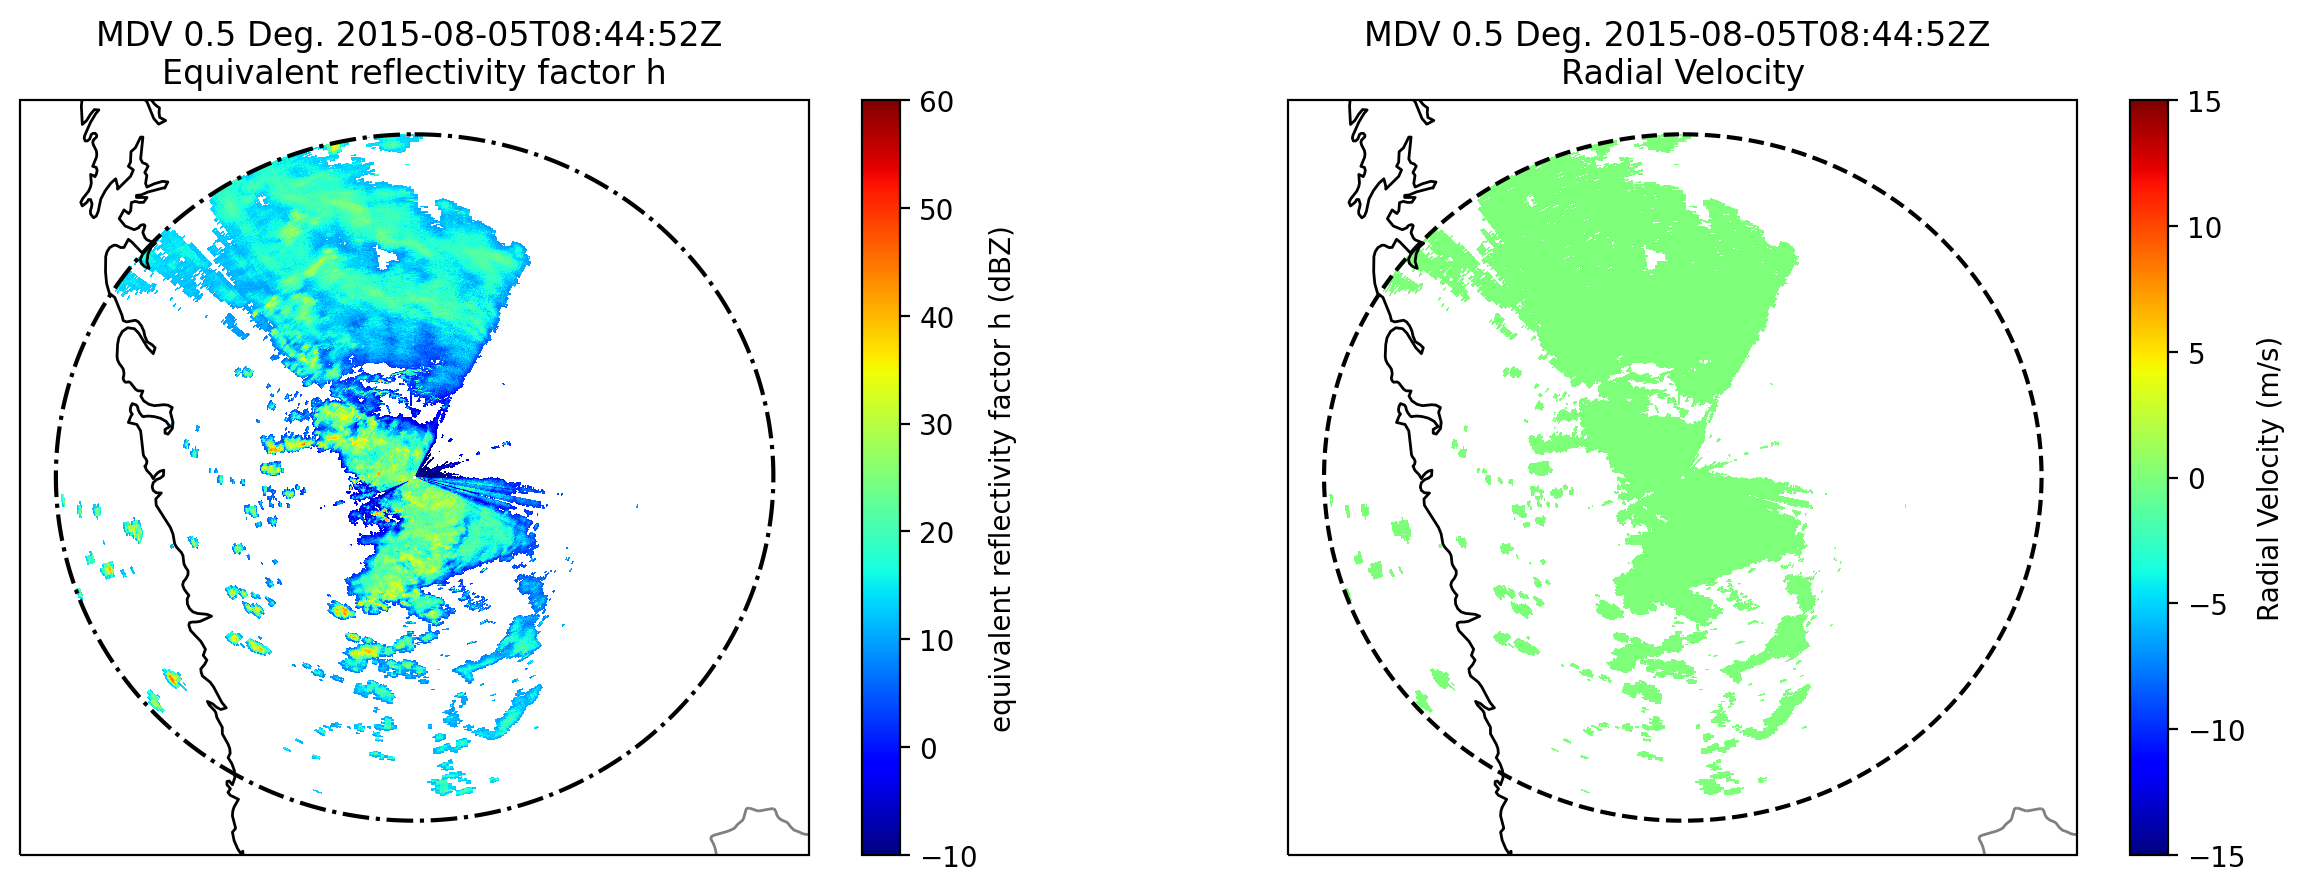

In [79]:
# Let us view the vleocity with the filter applied.
for i in range(1):
    fig = plt.figure(figsize=[15,5],dpi=200)
    ax = plt.subplot(1,2,1,projection=ccrs.PlateCarree())
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('DBZH',sweep=i, resolution='10m',
                         vmin=-10, vmax=60,
                         projection=ccrs.PlateCarree(), cmap='jet',)
    display.plot_range_ring(radar.range['data'][2], line_style='k-.')

    ax = plt.subplot(1,2,2,projection=ccrs.PlateCarree())
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('c_velh', sweep=i, resolution='10m',
                         vmin=-15, vmax=15,
                         projection=ccrs.PlateCarree(),cmap='jet')
    display.plot_range_ring(radar.range['data'][2], line_style='k--')
    plt.show()